In [69]:
!cat /data/Lab6_data/mixed_reads* > ./mixed_reads.fastq

What will you use for the database?
- /data/references/hg19/hg19 (the human reference genome)

Input reads? 
- ./mixed_reads.fastq (cat'ed together mixed_reads1 and mixed_reads2)

If you use the --un unaligned.fastq option, what will unaligned.fastq contain? 
- unaligned.fastq will contain all reads which don't map to the human genome i.e. reads which likely map to S. oneidensis genome instead

In [14]:
# align reads to human genome to filter out human contaminants, the filtered reads will go to unaligned.fastq

!bowtie2 –p 4 --very-fast --no-unal -x /data/references/hg19/ -U ./mixed_reads.fastq -S output.sam --un unaligned.fastq

Extra parameter(s) specified: "4", "/data/Lab6_data/mixed_reads2.fastq"
Error: Encountered internal Bowtie 2 exception (#1)
Command: /opt/anaconda3/bin/bowtie2-align-s --wrapper basic-0 --very-fast -x /data/references/hg19/ --passthrough -U /data/Lab6_data/mixed_reads1.fastq –p 4 /data/Lab6_data/mixed_reads2.fastq 
(ERR): bowtie2-align exited with value 1


#### Output from aligning mixed_reads to human genome

```
2570882 reads; of these:
  2570882 (100.00%) were unpaired; of these:
    2060197 (80.14%) aligned 0 times
    468483 (18.22%) aligned exactly 1 time
    42202 (1.64%) aligned >1 times
19.86% overall alignment rate
```

What percentage of your sequencing library came from contaminating human DNA?
- 19.86% of the reads aligned to the human genome meaning at least this percentage of the DNA was contaminating human DNA

In [ ]:
# align filtered reads to S. oneidensis genome

!bowtie2 –p 4 --very-fast --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -U unaligned.fastq -S aligned.sam

#### Output from aligning filtered reads to  S. oneidensis genome --very-fast

```
2060197 reads; of these:
  2060197 (100.00%) were unpaired; of these:
    733772 (35.62%) aligned 0 times
    1238875 (60.13%) aligned exactly 1 time
    87550 (4.25%) aligned >1 times
64.38% overall alignment rate
```

#### Output from aligning filtered reads to  S. oneidensis genome --very-fast

```
2060197 reads; of these:
  2060197 (100.00%) were unpaired; of these:
    728613 (35.37%) aligned 0 times
    1242169 (60.29%) aligned exactly 1 time
    89415 (4.34%) aligned >1 times
64.63% overall alignment rate
```

If you use the --un unaligned.fastq option, what will unaligned.fastq contain?
- All reads which didn't map to either the human or S. oneidensis genome

What percentage of your filtered library didn’t align to the reference genome?
- 35.62% using --very-fast flag and 35.37% using --very-sensitive flag

If you use --very-sensitive instead of --very-fast, does this percentage increase or decrease? 
- Yes, see above

In [70]:
# Processing using samtools

!samtools view -b aligned1.sam > aligned1.bam
!samtools sort aligned1.bam > aligned1.sorted.bam
!samtools index aligned1.sorted.bam
!samtools depth -a aligned1.sorted.bam > pileup.tab

In [71]:
import pandas as pd

!gunzip pileup.tab.gz

data = pd.read_csv('pileup.tab', sep='\t', header=None)
data.columns = ['Reference', 'position', 'depth']

gzip: pileup.tab.gz: No such file or directory


What is the min, max, and mean coverage across all positions?
- See below

In [63]:
print(min(data.depth))
print(max(data.depth))
print(sum(data.depth) / len(data.depth))

1
457
70.44318087922572


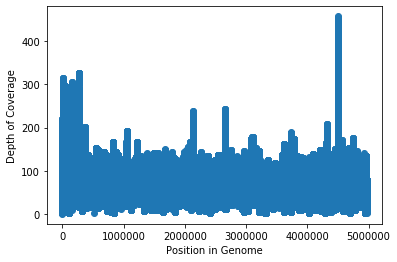

In [67]:
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline  

plt.scatter(data.position, data.depth)
plt.ylabel('Depth of Coverage')
plt.xlabel('Position in Genome')
plt.show()

Text(0, 0.5, 'Count')

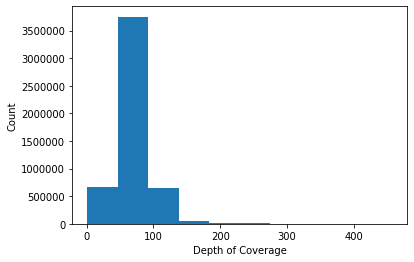

In [68]:
matplotlib.pyplot.hist(data.depth)
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')

How many reads map to humans? 
- 2570882 - 2060197 = 510685

How many map to S. oneidensis? 
- 2060197 - 728613 = 1331584

Do the reads cover the S. oneidensis genome uniformly? 
- No. From the scatterplot we can see that certain positions in the genome have a lot more reads aligned to them than others.